# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

FOr the following analysis I've preloaded the file on Google Colab files area.

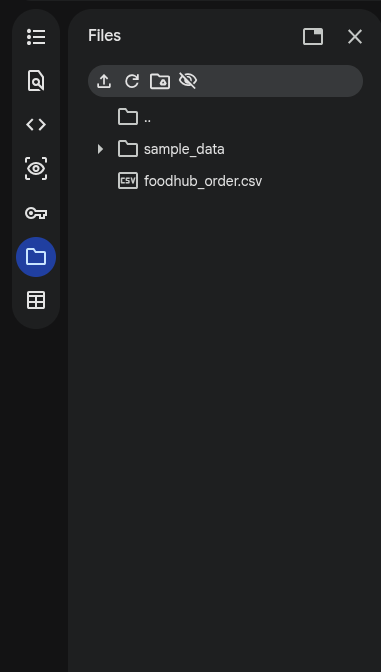

In [2]:
# Preloaded the file to session, this require to upload the file in sidebar of
df = pd.read_csv('foodhub_order.csv')

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
rows_count = df.shape[0]
columns_count = df.shape[1]

print(f"We have {rows_count} rows and {columns_count} columns")

We have 1898 rows and 9 columns


#### Observations:
By using shape method we can get the shape of the dataframe in this case 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
 Data types could be obtained using info method

order_id: int64

customer_id: int64

restaurant_name: object

cuisine_type: object

cost_of_the_order: float64

day_of_the_week: object

rating: object

food_preparation_time: int64

delivery_time: int64



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
The dataset doesn't have null values. But we can see some 'Not given' inputs on rating.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df['food_preparation_time'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


#### Observations:

As we can see food could take to be prepared:

- A minimum of 20 minutes
- A maximun of 35 minutes
- and in averga 27,37 minutes





### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# values count of rating
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
df['rating'].value_counts(normalize=True)

,proportion
rating,
Not given,0.387777
5,0.309800
4,0.203372
3,0.099052


#### Observations:

Using value_counts we can see that we have `736` Not given ratings which suggest 38,78% of the people doesn't give a rating.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# confirming no duplicates in place before continue
df.duplicated().sum()

np.int64(0)

We have 9 columns as noted before we are gonna explore each of them


## 1. Cuisine Type

Given the amount of restaurants would be difficult to gather information from an histogram but we can find top performers and the worst ones

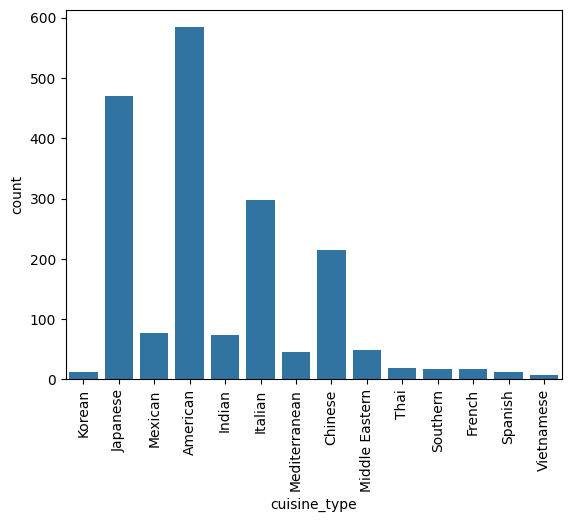

In [ ]:
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby("cuisine_type")["cost_of_the_order"].sum().sort_values(ascending=False).head(5)

,cost_of_the_order
cuisine_type,
American,9530.78
Japanese,7663.13
Italian,4892.77
Chinese,3505.62
Mexican,1303.85


For cuisine_type we can see whe have 5 top performers: American, Japanese, Italian, Chinese and Mexican, and seems like prices are proportional to their fame because the cost_of_the_order has a similar share than volume of orders.

### 2. Food preparation time


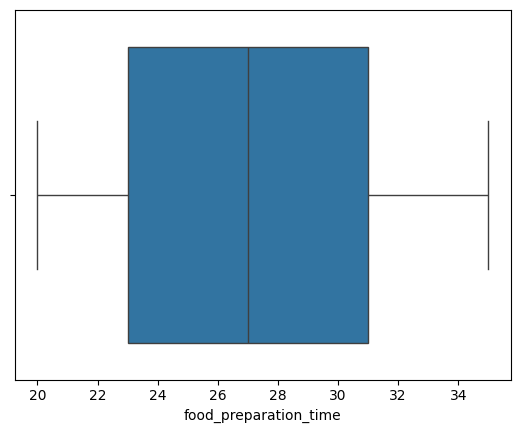

In [ ]:
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

We can find there are no outliers on the food_preapratio_time:
Q1 starts between 22-24
Median lives between 26-28
Q3 ends between 30-32


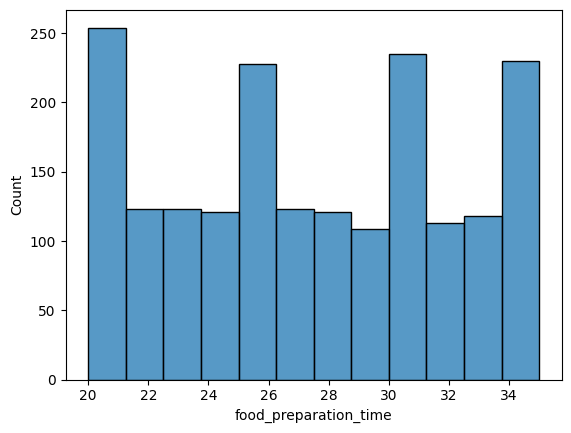

In [ ]:
sns.histplot(data=df, x='food_preparation_time')
plt.show()

We can see distribution is spread out, not skwed to any side.

### 3. Day of the week

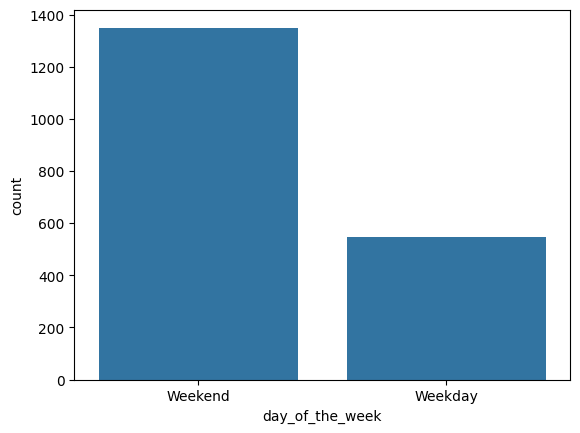

In [ ]:
sns.countplot(data=df, x='day_of_the_week')
plt.show()

We can see a clear higher demand over the weekends, which is pretty common in restaurants.

### 4. Delivery time

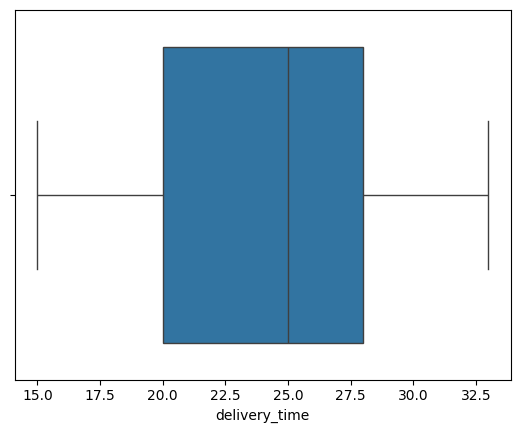

In [ ]:
sns.boxplot(data=df, x='delivery_time');

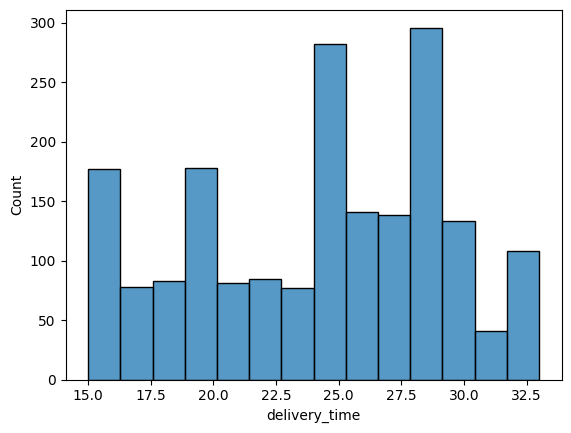

In [ ]:
sns.histplot(data=df, x='delivery_time')
plt.show()

Box plot for this one tell us there are no outliers again, and we can see a spead distribution with some peaks around 15, 20, 25 and 30

### 5. Cost of the order

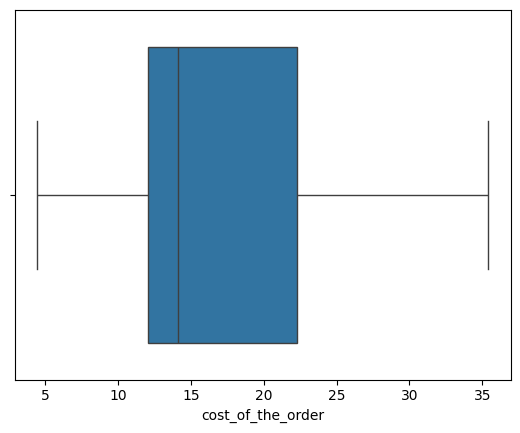

In [ ]:
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

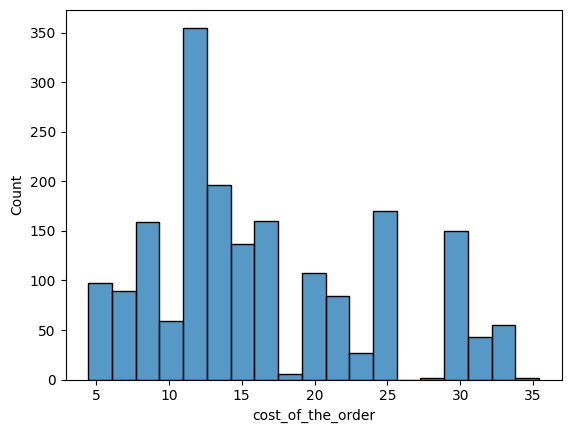

In [ ]:
sns.histplot(data=df, x='cost_of_the_order')
plt.show()

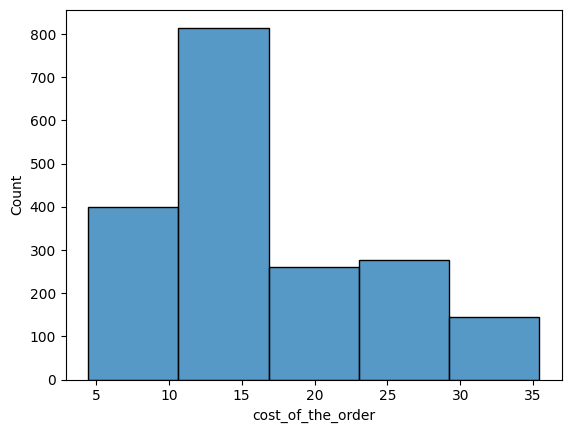

In [ ]:
sns.histplot(data=df, x='cost_of_the_order', bins=5)
plt.show()

We can see that orders goes from 5 to 35 and if we see the full histogram it appears to be well spreaded, but if we reduce the number of bins we can se a concentration on the cost between a bit more than 10 (maybe 11) and between 20 and 25.

### 6. Rating

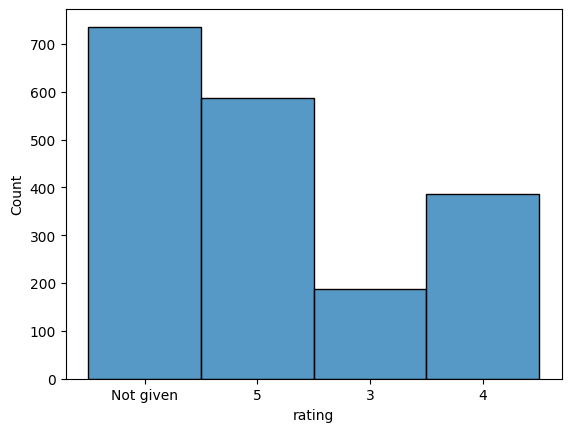

In [ ]:
sns.histplot(data=df, x='rating')
plt.show()

When checking ratings we can find something that might be good, all reviews goes above 2 so cusotmers that gives rating are normally happy. We might need to get more information on what are the circumstances on when a user doesn't provide a rating.

In [ ]:
data_rating = df[df['rating'] != 'Not given'].copy()
data_rating['rating'] = data_rating['rating'].astype(float)
data_rating.reset_index(drop=True, inplace=True)
data_rating['rating'].mean()

np.float64(4.344234079173838)

If we remove not given we have a 4.34 as mean of reviews which is very good.

### 7. Customer (customer_id)

In [ ]:
len(df['customer_id'].unique())

1200

As we have 1200 customers it won't make sense to use historgam at least for all of them so we can use some calculation to gather information to analyze.

In [ ]:
df['cost_of_the_order'].groupby(df['customer_id']).sum().sort_values(ascending=False).head(5)

,cost_of_the_order
customer_id,
52832,225.80
250494,183.83
47440,158.18
276192,146.46
83287,139.31


In [ ]:
df["customer_id"].value_counts().reset_index()

,customer_id,count
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,259341,7
...,...,...
1195,143926,1
1196,89574,1
1197,157711,1
1198,66393,1


For example we can identify out top 5 customers by the amount consumed or the ones that have more orders with us (fidelity)



In [ ]:
df.groupby(["customer_id", "restaurant_name"]).size().reset_index(name="order_count").sort_values(["customer_id", "order_count"], ascending=[True, False]).drop_duplicates(subset="customer_id")

,customer_id,restaurant_name,order_count
0,1311,Chipotle Mexican Grill $1.99 Delivery,1
1,5139,Sushi of Gari 46,1
2,5444,Go! Go! Curry!,1
3,5693,The Meatball Shop,1
4,6987,Hill Country Fried Chicken,2
...,...,...,...
1430,402215,RedFarm Hudson,1
1431,403019,S'MAC,1
1432,403833,Room Service,1
1433,404649,Parm,1


Tried to get customers's favorite restaurant but seems like there are no repeated orders.


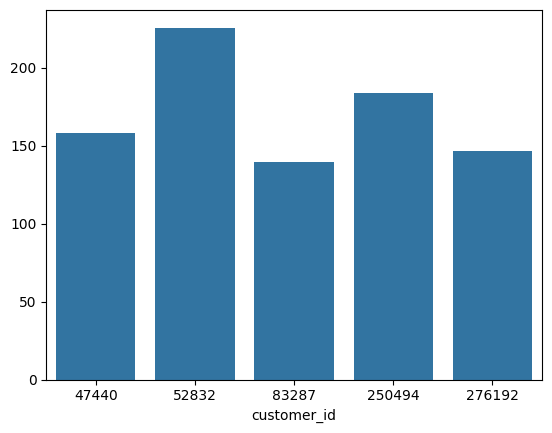

In [ ]:
grouped_customer_data = df['cost_of_the_order'].groupby(df['customer_id']).sum().sort_values(ascending=False).head(5)
sns.barplot(x=grouped_customer_data.index, y=grouped_customer_data.values)
plt.show()

# 8. Restaurant name


In [ ]:
top_restaurants = df['restaurant_name'].value_counts().head(10)
display(top_restaurants)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55
TAO,49
Han Dynasty,46


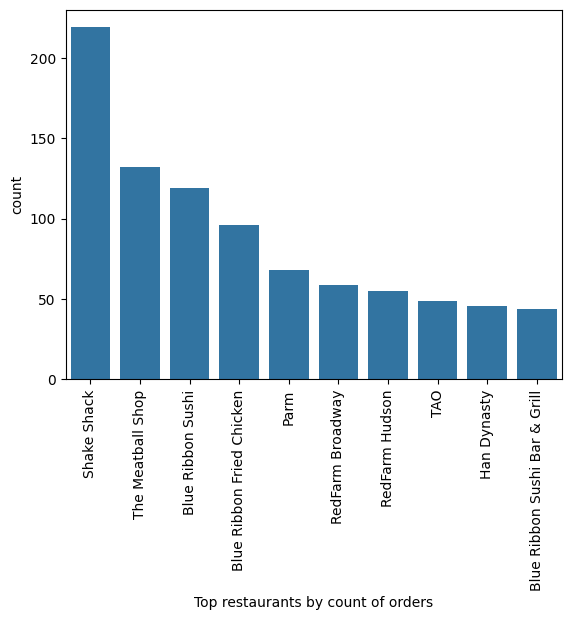

In [ ]:
sns.barplot(data=top_restaurants)
plt.xlabel("Top restaurants by count of orders")
plt.xticks(rotation=90)
plt.show()

We can find and display the favorite restaurants of the people by knowing the ones with the most orders.

In [ ]:
top_rated_restaurants = data_rating['rating'].groupby(df['restaurant_name']).mean().sort_values(ascending=False).head(10)
display(top_rated_restaurants)

,rating
restaurant_name,
Alidoro,5.0
Anjappar Chettinad,5.0
Bistango,5.0
Big Wong Restaurant _¤¾Ñ¼,5.0
Big Daddy's,5.0
UVA Wine Bar & Restaurant,5.0
The Odeon,5.0
Song Thai Restaurant & Bar,5.0
V-Nam Cafe,5.0


Also we can get the best rated restaurants, no making graph given all of them have 5 points.

# 9. Order Id

Not really much to get, this is basically an identifier, not for making much calculations or filters, but we can get some stuff

In [ ]:
high_priced_orders = df.sort_values('cost_of_the_order',ascending=False).head(5)

<Axes: xlabel='order_id', ylabel='cost_of_the_order'>

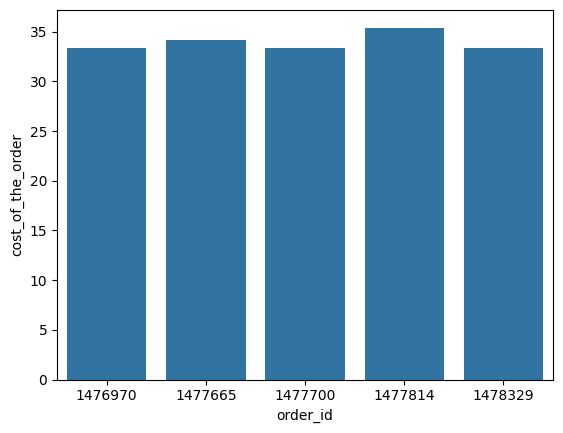

In [ ]:
sns.barplot(data=high_priced_orders, x='order_id', y='cost_of_the_order')

The orders of the highest price have a pretty similar value.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

The top 5 restaurants by order count are: Shake Shack, The Meatball Shop, Blue Rubbon Sushi, Blue Rubbon Fried Chicken, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df[df["day_of_the_week"] == 'Weekend'].groupby("cuisine_type").size().sort_values(ascending=False).head(1)

,0
cuisine_type,
American,415


#### Observations:

American cuisine is the top one, with 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
len(df[df['cost_of_the_order'] > 20])

555

In [ ]:
len(df[df['cost_of_the_order'] > 20]) / len(df) * 100

29.24130663856691

#### Observations:
We have 555 orders which represents: 29,24 %


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean()

np.float64(24.161749209694417)

#### Observations:
The Mean delivery time is 24,16 minutes



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df["customer_id"].value_counts().reset_index().head(3)

,customer_id,count
0,52832,13
1,47440,10
2,83287,9


#### Observations:
The top three customers are:
- Customer: 52832	with 13 orders
- Customer: 47440	with 10 orders
- Customer 83287	with 9 orders



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Let's make the "Not given" ratings NaN so we can fill them with meaningful values, like the median of the rating given to that cuisine_type.

In [16]:
# Make Not given values to be null
df['rating'] = df['rating'].replace('Not given', np.nan)

In [17]:
df['rating'].isnull().value_counts()

,count
rating,
False,1898


In [18]:
df['rating'] = df['rating'].astype(float)
df['rating'] = df['rating'].fillna(df.groupby(['cuisine_type'])['rating'].transform('mean'))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [20]:
df[['food_preparation_time','delivery_time','rating','cost_of_the_order']].corr()

,food_preparation_time,delivery_time,rating,cost_of_the_order
food_preparation_time,1.000000,0.011094,-0.001577,0.041527
delivery_time,0.011094,1.000000,-0.005128,-0.029949
rating,-0.001577,-0.005128,1.000000,0.030828
cost_of_the_order,0.041527,-0.029949,0.030828,1.000000


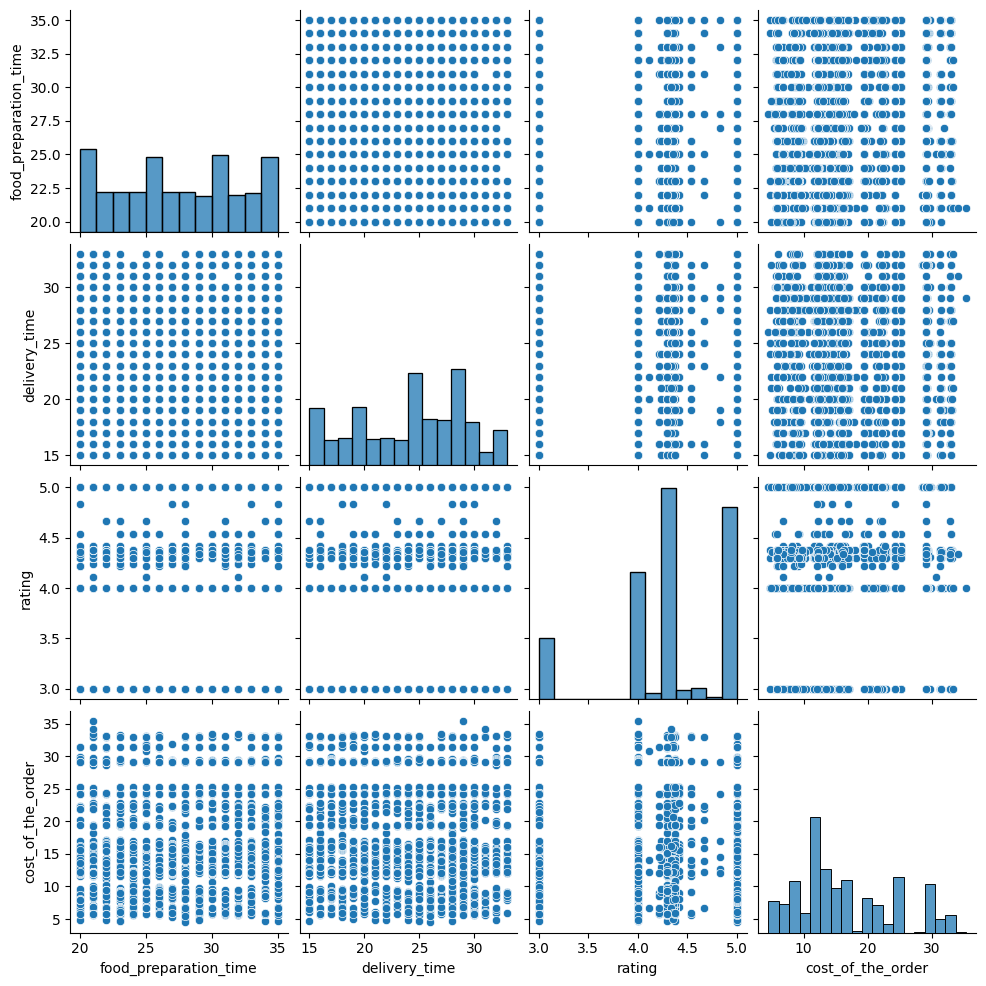

In [14]:
sns.pairplot(data=df[['food_preparation_time','delivery_time','rating','cost_of_the_order']])

> Neither the pairplot nor the correlation results show significant correlations between the variables.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [15]:
# For this I'm gonna use the original rating as origin without the Not given
df_promotion13 = df[df['rating'] != 'Not given'].copy()
df_promotion13['rating'] = df_promotion13['rating'].astype(int)

restaurants_with_more_than_50_ratings = df_promotion13['restaurant_name'].value_counts()
restaurants_with_more_than_50_ratings = restaurants_with_more_than_50_ratings[restaurants_with_more_than_50_ratings>50]

df_promotion13 = df_promotion13[df_promotion13['restaurant_name'].isin(restaurants_with_more_than_50_ratings.index)].copy()

df_promotion13['rating'].groupby(df_promotion13['restaurant_name']).mean()

,rating
restaurant_name,
Blue Ribbon Fried Chicken,4.218750
Blue Ribbon Sushi,4.134454
Parm,4.073529
RedFarm Broadway,4.169492
RedFarm Hudson,4.109091
Shake Shack,4.168950
The Meatball Shop,4.325758


Normaly we would require additional step to filter out restaurants which mean rating is not complying with requirement, but as the result is clearly visible we can conclude the restaurants participating on the promotion are:
- Blue Ribbon Fried Chicken with mean rating 4.328125
- Blue Ribbon Sushi with mean rating	4.219178
- Shake Shack with mean rating	4.278195
- The Meatball Shop with mean rating 4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
df["charge"] = (
    (df["cost_of_the_order"] > 20) * 0.25 +
    ((df["cost_of_the_order"] > 5) & (df["cost_of_the_order"] <= 20)) * 0.15
)

In [ ]:
df['commision'] = df['cost_of_the_order'] * df['charge']

In [ ]:
df['commision'].sum()

np.float64(6166.303)

#### Observations:

Revenue of the company is $6166.30 USD


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# We create a new colum for total_delivery_time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
# filter the ones taking more than 60 mins
above_60_minutes = df['total_delivery_time'] > 60
# Get the mean as the booleans are gonna be treated as 1 and 0 when calculating this will work as a good way to get the participation
above_60_minutes.mean() * 100

np.float64(10.537407797681771)

#### Observations:

We can see `10.54%` of the orders are taking more than 60 minutes.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
df['total_delivery_time'].groupby(df['day_of_the_week']).mean()

,total_delivery_time
day_of_the_week,
Weekday,55.552102
Weekend,49.906736


#### Observations:

Delivery time on weekends seems to be faster, this could be given less traffic jams, or riders availability.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- The dataset contains 1898 orders and the main variables are order cost, cuisine type, food preparation time, delivery time, and rating.

- There are no null values, but the rating column contains values like "Not given", so not every order has a valid rating.

- Most orders have a medium cost range, and only a small portion of orders are expensive.

- Preparation and delivery times are mostly between 20 and 35 minutes, and the total delivery time usually stays in a normal range.

- After checking the pairplots and the correlation matrix, there is no strong correlation between cost_of_the_order, food_preparation_time, delivery_time, and rating.
So higher cost orders are not necessarily slower, and slower orders are not always rated worse.

- Weekend behavior is different from weekdays, and some cuisine types become more popular during weekends.

### Recommendations:

- The company should promote restaurants with many ratings and good average rating, because they are the most reliable options for ads and will likely attract more customers.

- It's important to reduce orders that take more than 60 minutes total, since long waiting times can impact customer satisfaction.

- Since the company earns more commission from orders above $20, it would be useful to encourage more high-value orders using deals like combos, family meals, or premium menus.

- The company should push customers to leave more ratings (reduce “Not given”), because ratings are very valuable to identify top restaurants and improve the recommendation system.

- Restaurants and cuisines that perform well on weekends should receive extra visibility during weekend promotions, since demand is higher in that period.